# 1\. Introdução
A Udemy é uma plataforma online de ensino que possui mais de 200 mil cursos abrangendo em torno de 75 idiomas. Neste notebook irei realizar uma análise dos cursos da Udemy.

#TODO  
Criar dashboard no **Power BI** ou **Tableau**.  
Usar SQL?

# 2\. Bibliotecas e Datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Polygon
import langdetect

In [2]:
# Dataset dos cursos
udemy_cursos = pd.read_csv('data/udemy_cursos.csv') # https://www.kaggle.com/datasets/hossaingh/udemy-courses

In [3]:
# Dataset dos comentários
udemy_comentarios = pd.read_csv('data/udemy_comentarios.csv') # https://www.kaggle.com/datasets/hossaingh/udemy-courses

In [3]:
udemy_cursos.head(5)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [ ]:
udemy_comentarios.head(5)

# 3\. Dataset Cursos

Nesta seção será realizada a análise do dataset da Udemy

## 3\.1 Analisando o dataset

In [4]:
udemy_cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [5]:
udemy_cursos.isna().sum()

id                      0
title                   0
is_paid                 0
price                   0
headline               27
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

In [6]:
# Altera a maneira que o Pandas mostra as colunas
pd.set_option('display.max_columns', 0) # default:0, None mostra todas as colunas
pd.set_option('display.max_colwidth', 50) # defaul:50, None mostra o conteúdo completo das colunas

In [7]:
# Converte os tipos de dados
udemy_cursos['num_subscribers'] = udemy_cursos['num_subscribers'].astype(int)
udemy_cursos['num_reviews'] = udemy_cursos['num_reviews'].astype(int)
udemy_cursos['num_comments'] = udemy_cursos['num_comments'].astype(int)
udemy_cursos['num_lectures'] = udemy_cursos['num_lectures'].astype(int)
udemy_cursos['num_lectures'] = udemy_cursos['num_lectures'].astype(int)
udemy_cursos['content_length_min'] = udemy_cursos['content_length_min'].astype(int)
udemy_cursos['published_time'] = pd.to_datetime(udemy_cursos['published_time'], dayfirst=False, errors = 'coerce')
udemy_cursos['last_update_date'] = pd.to_datetime(udemy_cursos['last_update_date'], format='%Y-%m-%d', errors = 'raise')

In [8]:
# Preenche os campos nulos
udemy_cursos = (udemy_cursos.fillna('-'))

In [9]:
udemy_cursos.dtypes

id                                float64
title                              object
is_paid                              bool
price                             float64
headline                           object
num_subscribers                     int32
avg_rating                        float64
num_reviews                         int32
num_comments                        int32
num_lectures                        int32
content_length_min                  int32
published_time        datetime64[ns, UTC]
last_update_date                   object
category                           object
subcategory                        object
topic                              object
language                           object
course_url                         object
instructor_name                    object
instructor_url                     object
dtype: object

In [10]:
udemy_cursos.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231,3.75,134,42,37,1268,2010-08-05 22:06:13+00:00,2020-11-06 00:00:00,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474,4.50,709,112,9,88,2010-01-12 18:09:46+00:00,-,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713,4.40,41,13,14,82,2010-10-13 18:07:17+00:00,2019-10-09 00:00:00,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988,4.80,395,88,36,1511,2011-06-20 20:08:38+00:00,2016-01-13 00:00:00,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266,4.75,38,12,38,569,2011-06-23 18:31:20+00:00,-,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [11]:
# Mostra as linhas que possuem campo nulo
udemy_cursos[udemy_cursos['last_update_date'].isna()]

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url


In [12]:
udemy_cursos.columns

Index(['id', 'title', 'is_paid', 'price', 'headline', 'num_subscribers',
       'avg_rating', 'num_reviews', 'num_comments', 'num_lectures',
       'content_length_min', 'published_time', 'last_update_date', 'category',
       'subcategory', 'topic', 'language', 'course_url', 'instructor_name',
       'instructor_url'],
      dtype='object')

In [13]:
# Mostra a quantidade de cursos por categoria
udemy_cursos['category'].value_counts()

Development             31643
IT & Software           30479
Teaching & Academics    26293
Business                24670
Personal Development    21239
Design                  15256
Health & Fitness        11568
Marketing               11221
Lifestyle               10653
Finance & Accounting    10572
Office Productivity      6297
Music                    5977
Photography & Video      3866
Name: category, dtype: int64

In [14]:
# Mostra a quantidade de cursos por idioma
udemy_cursos['language'].value_counts().head(10)

English       123921
Portuguese     18471
Spanish        17428
Turkish         8100
Japanese        7006
German          6101
French          5465
Arabic          5197
Italian         3637
Russian         2686
Name: language, dtype: int64

## 3\.2 Visualizando o dataset

### Preço

In [15]:
# Função para gerar moeda no padrão brasileiro
# locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8') 'en_us'
# locale.setlocale(locale.LC_MONETARY, 'pt_BR.UTF-8') 'en_us'
# import locale

# udemy_pago = len(udemy_cursos[udemy_cursos["is_paid"]==True])
# udemy_gratis = len(udemy_cursos[udemy_cursos["is_paid"]==False])
# udemy_total = len(udemy_cursos)

# def format_currency(amount):
#     locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
#     locale.setlocale(locale.LC_MONETARY, 'pt_BR.UTF-8')
#     formatted_amount = locale.currency(amount, grouping=True)
#     return formatted_amount

#print(f'Do total de {udemy_total:n} cursos, cerca de 90% ({udemy_pago:,}) dos cursos são pagos e 10% ({udemy_gratis:,}) são gratuitos.')
#print(f'Do total de {udemy_total:n} cursos, {format_currency(udemy_pago)} são pagos e {format_currency(udemy_gratis)} são gratuitos.')

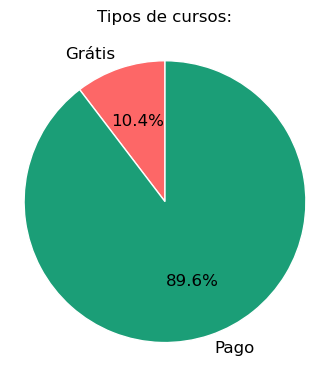

Do total de 209734 cursos, cerca de 90% (187,996) dos cursos são pagos e 10% (21,738) são gratuitos.


In [16]:
# Visualização em pizza da porcentagem de cursos grátis e pagos.
plt.figure(figsize = (4, 4))
plt.pie(udemy_cursos.groupby(['is_paid']).size(),
        labels = ['Grátis', 'Pago'], 
        autopct = '%1.1f%%',
        startangle = 90, colors = ['#fd6767','#1b9e77'],
        textprops = {'size': 12},
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True})
plt.axis('equal')
plt.title('Tipos de cursos:\n',loc='center', fontdict={'fontsize': 12})
plt.show()

udemy_pago = len(udemy_cursos[udemy_cursos["is_paid"]==True])
udemy_gratis = len(udemy_cursos[udemy_cursos["is_paid"]==False])
udemy_total = len(udemy_cursos)

print(f'Do total de {udemy_total:n} cursos, cerca de 90% ({udemy_pago:,}) dos cursos são pagos e 10% ({udemy_gratis:,}) são gratuitos.')

In [17]:
# Porcentagem de preço
#udemy_price_real = udemy_cursos.loc[udemy_cursos['language'] == 'Portuguese']['price'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
#udemy_price_dolar = udemy_cursos.loc[udemy_cursos['language'] == 'English']['price'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
udemy_price = (udemy_cursos['price'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%').head(10)
print(f'Porcentagem de preço:\n{udemy_price}\n')
print('Cerca de 20% dos cursos custam $19.99 e apenas 8% custam $199.99')

Porcentagem de preço:
19.99     20.8%
0.00      10.4%
199.99     8.3%
99.99      4.8%
24.99      4.7%
29.99      4.7%
49.99      4.7%
79.90      3.5%
1.00       2.8%
39.99      2.7%
Name: price, dtype: object

Cerca de 20% dos cursos custam $19.99 e apenas 8% custam $199.99


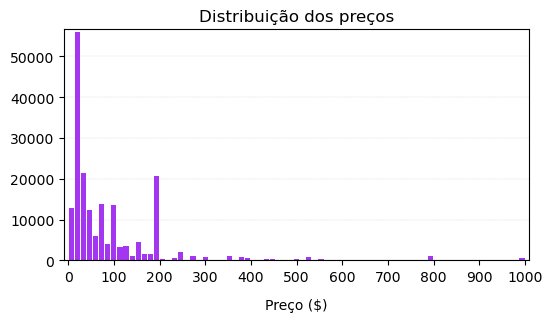

A maioria dos cursos possui valor inferior a $200


In [18]:
# Distribuição dos preços dos cursos
plt.figure(figsize = (6, 3), dpi=100)
plt.hist(udemy_cursos[udemy_cursos['is_paid']==True]['price'], bins=75, rwidth=0.85, color='#A435F0')
#sns.histplot(data=udemy_cursos[udemy_cursos['is_paid']==True], x='price', bins=75, color='#A435F0')
plt.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,1001,100))
plt.margins(0.01)
plt.xlabel("Preço ($)", labelpad=10)
plt.ylabel("")
plt.title('Distribuição dos preços',loc='center', fontdict={'fontsize': 12})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

print('A maioria dos cursos possui valor inferior a $200')

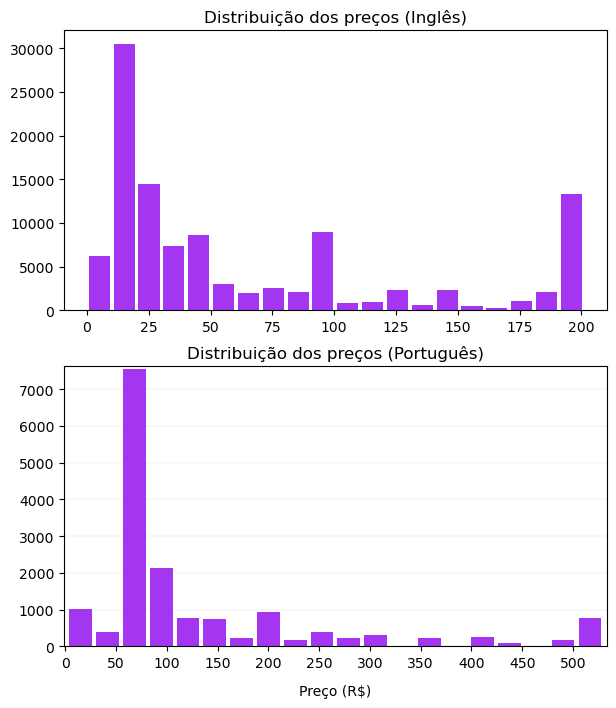

In [19]:
# Distribuição dos preços dos cursos
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (7,8))
ax1.hist(udemy_cursos[(udemy_cursos['is_paid']==True) & (udemy_cursos['language']=='English')]['price'],
         bins=20,
         rwidth=0.85,
         range=(0,201),
         color='#A435F0')
ax2.hist(udemy_cursos[(udemy_cursos['is_paid']==True) & (udemy_cursos['language']=='Portuguese')]['price'],
         bins=20,
         rwidth=0.85,
         color='#A435F0')
plt.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,551,50))
plt.margins(0.01)
plt.xlabel("Preço (R$)", labelpad=10)
plt.ylabel("")
ax1.set_title('Distribuição dos preços (Inglês)',loc='center', fontdict={'fontsize': 12})
ax2.set_title('Distribuição dos preços (Português)',loc='center', fontdict={'fontsize': 12})
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

Os cursos pagos com maior quantidade de matrículas custam $19.99 e $199.99


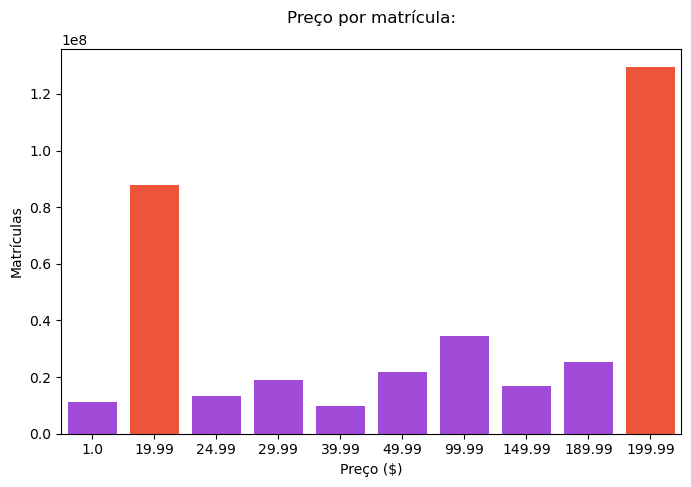

In [20]:
# Bar plot mostrando a distribuição de preço pelo número de matrículas
udemy_price_subscribers = (udemy_cursos.loc[ (udemy_cursos['price'] > 0) & (udemy_cursos['price']< 200) ]
        .groupby(by='price', as_index=False)['num_subscribers']
        .sum()
        .sort_values(by='num_subscribers',ascending=False))

plt.figure(figsize=(8,5), dpi=100)
ax = sns.barplot(data=udemy_price_subscribers[:10], x='price', y='num_subscribers', color='#A435F0')
ax.set(xlabel='Preço ($)', ylabel='Matrículas')
ax.set(title='Preço por matrícula:\n')
ax.patches[1].set_facecolor('#ed553b')
ax.patches[9].set_facecolor('#ed553b')

print('Os cursos pagos com maior quantidade de matrículas custam $19.99 e $199.99')

<AxesSubplot: xlabel='price', ylabel='category'>

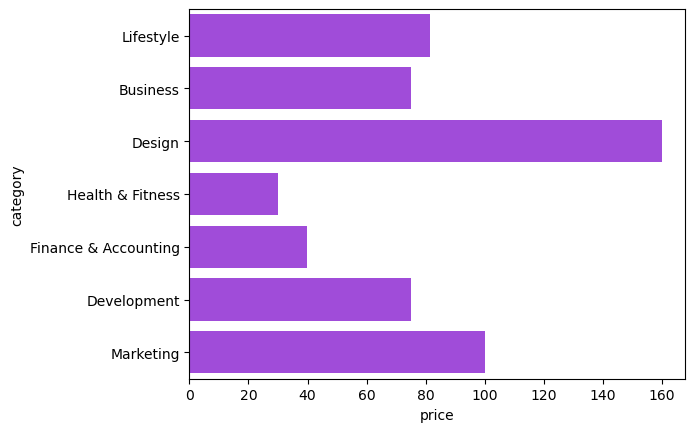

In [93]:
sns.barplot(data=udemy_cursos[:10], x='price', y='category', orient='h', color='#A435F0', errorbar=None)


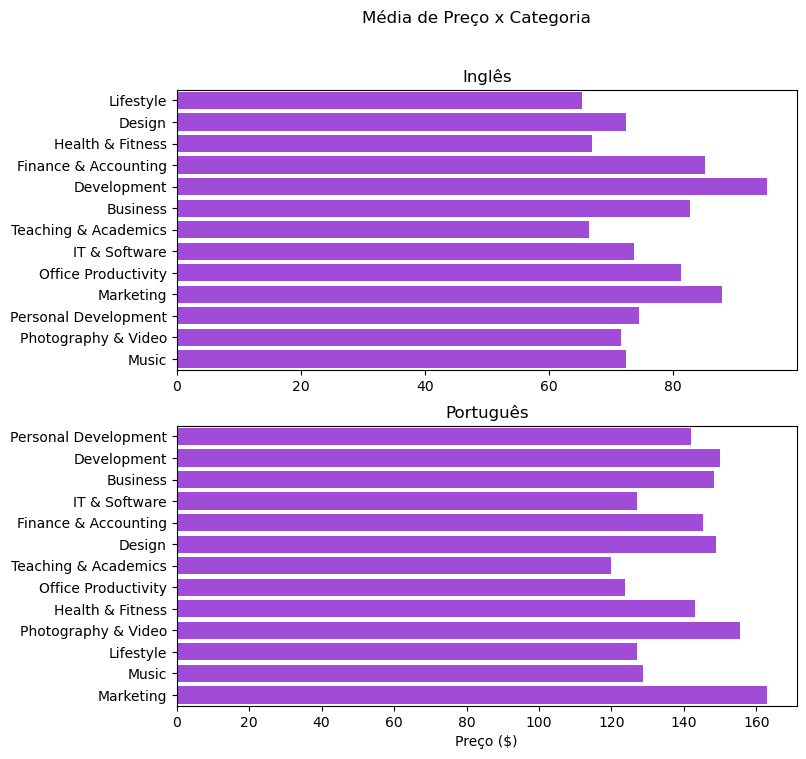

In [34]:
# Média dos preços dos cursos por categoria
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (8, 8))
#ax1.hist(udemy_cursos[udemy_cursos['is_paid']==True]['price'], bins=75, rwidth=0.85, color='#A435F0')
sns.barplot(ax=ax1, data=udemy_cursos[(udemy_cursos['is_paid']==True) & (udemy_cursos['language']=='English')], x='price', y='category', color='#A435F0', errorbar=None)
sns.barplot(ax=ax2, data=udemy_cursos[(udemy_cursos['is_paid']==True) & (udemy_cursos['language']=='Portuguese')], x='price', y='category', color='#A435F0', errorbar=None)
fig.suptitle('Média de Preço x Categoria')

ax1.set_title('Inglês', fontweight ="regular")
ax1.set(xlabel='', ylabel='')
ax2.set_title('Português', fontweight ="regular")
ax2.set(xlabel='Preço ($)', ylabel='')

plt.show()

#(udemy_cursos[(udemy_cursos['is_paid']==True) & (udemy_cursos['language']=='English')]['price']

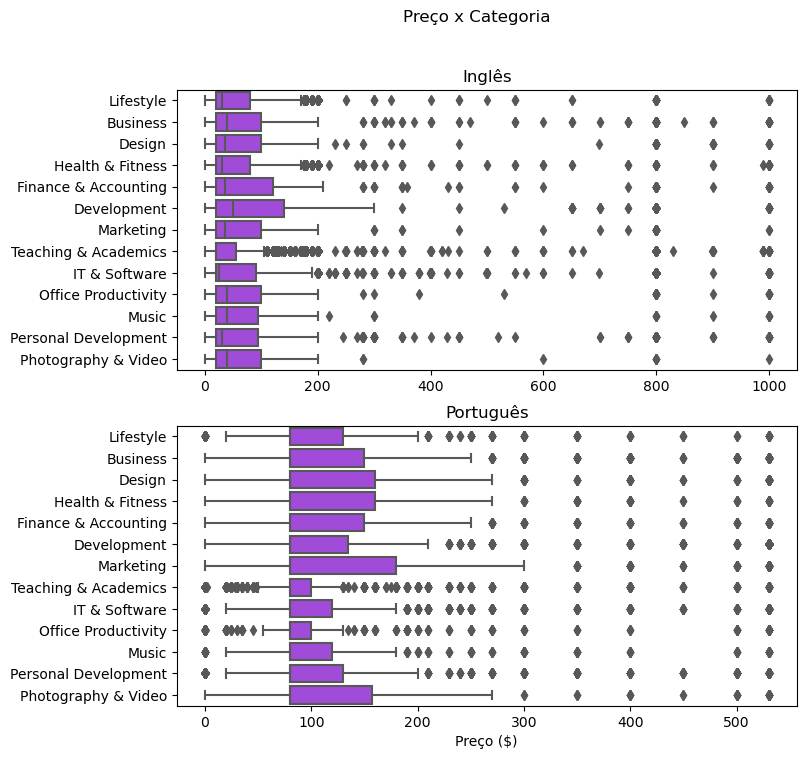

A maioria dos cursos possui valor inferior a $200


In [54]:
# Boxplot da média dos preços dos cursos por categoria
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (8, 8))
#ax1.hist(udemy_cursos[udemy_cursos['is_paid']==True]['price'], bins=75, rwidth=0.85, color='#A435F0')

sns.boxplot(ax=ax1, data=udemy_cursos, x=udemy_cursos[udemy_cursos['language']=='English']['price'], y=udemy_cursos['category'], color='#A435F0')
sns.boxplot(ax=ax2, data=udemy_cursos, x=udemy_cursos[udemy_cursos['language']=='Portuguese']['price'], y=udemy_cursos['category'], color='#A435F0')
fig.suptitle('Média de Preço x Categoria')

ax1.set_title('Inglês', fontweight ="regular")
ax1.set(xlabel='', ylabel='')
ax2.set_title('Português', fontweight ="regular")
ax2.set(xlabel='Preço ($)', ylabel='')

plt.show()

print('A maioria dos cursos possui valor inferior a $200')

In [25]:
udemy_cursos.price.describe().transpose()

count    209734.000000
mean         81.665529
std         117.317846
min           0.000000
25%          19.990000
50%          34.990000
75%          99.990000
max         999.990000
Name: price, dtype: float64

#### Conclusão

Cerca de 90% (187,996) dos cursos são pagos e 10% (21,738) são gratuitos.  
A maioria dos cursos possui o valor inferior a $200.  
Os cursos pagos com maior quantidade de matrículas custam $19.99 e $199.99.  
Os cursos que custam $19.99 equivalem a 20% do total de cursos  
Os cursos que custam $199.99 equivalem apenas 8% do total de cursos.

### Idioma

In [92]:
udemy_count_language = len(udemy_cursos['language'].unique())
print(f'Os cursos da Udemy são oferecidos em {udemy_count_language} idiomas.')

Os cursos da Udemy são oferecidos em 79 idiomas.


In [29]:
# Top 10 idiomas por curso
udemy_c = (udemy_cursos.groupby(['language'], as_index=False)
           .size()
           .sort_values(by='size',ascending=False)
           .rename(columns={'language':'Idioma', 'size':'Quantidade'}))
print('Top 10 cursos por idioma:')
print(udemy_c[:10].to_markdown(tablefmt="rounded_outline", index=False))

Top 10 cursos por idioma:
╭────────────┬──────────────╮
│ Idioma     │   Quantidade │
├────────────┼──────────────┤
│ English    │       123921 │
│ Portuguese │        18471 │
│ Spanish    │        17428 │
│ Turkish    │         8100 │
│ Japanese   │         7006 │
│ German     │         6101 │
│ French     │         5465 │
│ Arabic     │         5197 │
│ Italian    │         3637 │
│ Russian    │         2686 │
╰────────────┴──────────────╯


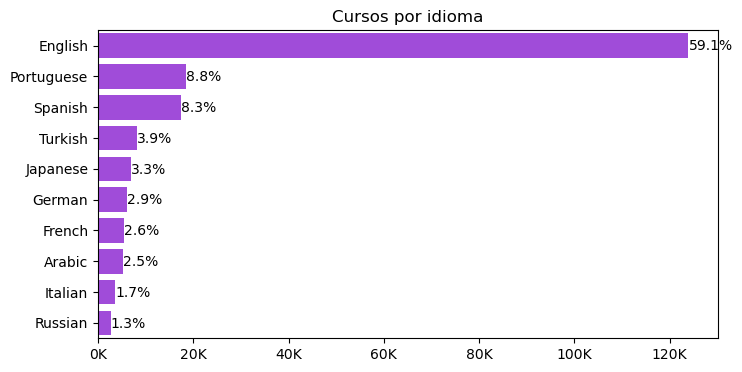

In [35]:
# Top 10 idiomas por curso em gráfico
fig, ax = plt.subplots(figsize=(8, 4)) 
sns.countplot(data=udemy_cursos, y='language', order=udemy_cursos['language'].value_counts().index[:10], color='#A435F0')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.xlabel("")
plt.ylabel("")
plt.title("Cursos por idioma", fontdict={'fontsize': 12})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda

# Porcentagem
total = len(udemy_cursos['language'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height() - 0.25
        ax.annotate(percentage, (x, y))
      
plt.show()

#sns.barplot(data=udemy_c[:10], x='Quantidade', y='Idioma', orient='h', color='#A435F0')

In [370]:
import plotly.express as px
# Top 15 languages
languages_top10 = round(udemy_cursos['language'].value_counts() * 100 / len(udemy_cursos), 2)[:10]

# Pie chart for top 15 languages visualization
fig = px.pie(languages_top10, values=languages_top10.values, 
             names=languages_top10.index, hole=0.25,
            )
fig.update_traces(textposition='inside', texttemplate = '%{label}<br>%{value}%', rotation=150)
fig.update_layout(title_text='Top 10 idiomas por curso', title_x=0.5, showlegend=False)
fig.show()

In [371]:
languages_top10

English       59.08
Portuguese     8.81
Spanish        8.31
Turkish        3.86
Japanese       3.34
German         2.91
French         2.61
Arabic         2.48
Italian        1.73
Russian        1.28
Name: language, dtype: float64

#### Conclusão
A Udemy oferece cursos em 79 idiomas, com 59% deles em inglês e 8% em português e espanhol.

### Duração

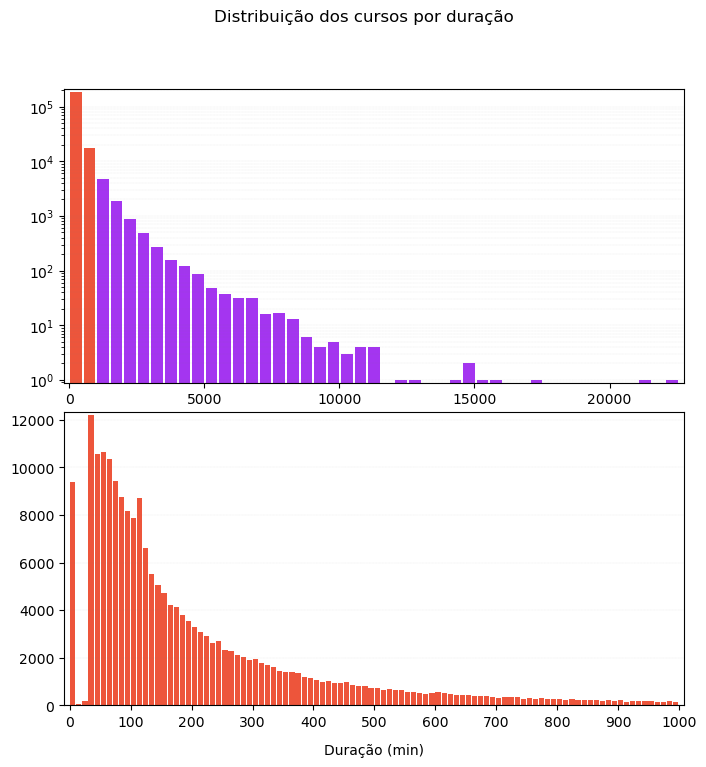

In [382]:
# Distribuição da duração dos cursos
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (8, 8))
N, bins, patches = ax1.hist(udemy_cursos['content_length_min'], rwidth=0.85, bins=45, color='#A435F0')

ax1.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1, which='both', alpha = 0.6)
ax1.margins(0.01)

patches[0].set_facecolor('#ed553b')
patches[1].set_facecolor('#ed553b')

plt.sca(ax1)
plt.yscale('log')
plt.ylabel("")

ax2.hist(udemy_cursos[udemy_cursos['content_length_min']<1000]['content_length_min'], rwidth=0.85, bins=100, color='#ed553b')
ax2.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1, alpha = 0.6)
ax2.margins(0.01)

plt.sca(ax2)
plt.xlabel("Duração (min)", labelpad=10)
plt.ylabel("")
plt.xticks(range(0,1001,100))
plt.subplots_adjust(hspace=0.1)
plt.suptitle('Distribuição dos cursos por duração')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

In [419]:
# Converte a duração para horas
udemy_cursos['content_length_hour'] = udemy_cursos['content_length_min'] # copia o campo duration para duration_hour
udemy_cursos[['content_length_min','content_length_hour']].head(5)
udemy_cursos['content_length_hour'] = (udemy_cursos['content_length_hour'].transform(lambda x: x/(60)))

In [420]:
udemy_cursos[['content_length_min','content_length_hour']].head(5)

,content_length_min,content_length_hour
0,1268,21.133333
1,88,1.466667
2,82,1.366667
3,1511,25.183333
4,569,9.483333


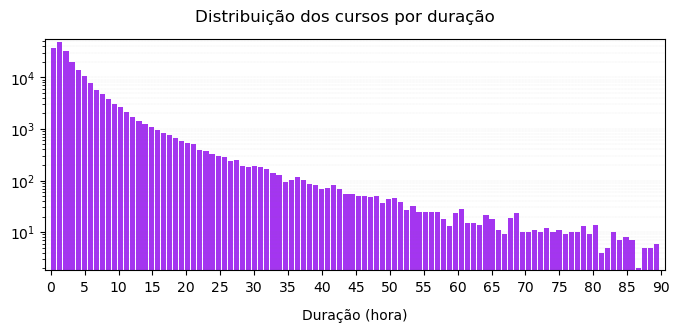

In [510]:
# Distribuição da duração dos cursos
plt.figure(figsize = (8, 3))
plt.hist(udemy_cursos[udemy_cursos['content_length_hour']<90]['content_length_hour'], bins=100, rwidth=0.85, color='#A435F0')

plt.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1, which='both', alpha = 0.6)
plt.margins(0.01)

# patches[0].set_facecolor('#ed553b')
# patches[1].set_facecolor('#ed553b')

plt.xticks(range(0,91,5))
plt.yscale('log')
plt.ylabel("")

plt.xlabel("Duração (hora)", labelpad=10)
plt.ylabel("")
plt.subplots_adjust(hspace=0.1)
plt.suptitle('Distribuição dos cursos por duração')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

In [506]:
aaa = (udemy_cursos.groupby('category')['content_length_hour']
       .describe()
       .sort_values(by='mean', ascending=False))
       #.rename_axis('Categoria'))
print(aaa.to_markdown(tablefmt="rounded_outline", index=True,floatfmt=',.0f'))
print('Os cursos de Desenvolvimento e Design possuem a maior média de duração, com 8 e 6 horas respectivamente.')

╭──────────────────────┬─────────┬────────┬───────┬───────┬───────┬───────┬───────┬───────╮
│ category             │   count │   mean │   std │   min │   25% │   50% │   75% │   max │
├──────────────────────┼─────────┼────────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ Development          │  31,643 │      8 │    11 │     0 │     2 │     4 │     9 │   356 │
│ Design               │  15,256 │      6 │     8 │     0 │     2 │     3 │     7 │   238 │
│ Office Productivity  │   6,297 │      5 │     7 │     0 │     2 │     3 │     6 │   137 │
│ IT & Software        │  30,479 │      5 │     8 │     0 │     1 │     2 │     5 │   201 │
│ Teaching & Academics │  26,293 │      5 │     8 │     0 │     1 │     2 │     5 │   376 │
│ Finance & Accounting │  10,572 │      4 │     7 │     0 │     1 │     2 │     4 │   243 │
│ Photography & Video  │   3,866 │      3 │     4 │     0 │     1 │     2 │     4 │    64 │
│ Music                │   5,977 │      3 │     4 │     0 │     1 │     2 │     

In [507]:
udemy_cursos.content_length_hour.describe()

count    209734.000000
mean          4.425981
std           7.574145
min           0.000000
25%           1.150000
50%           2.216667
75%           4.816667
max         376.166667
Name: content_length_hour, dtype: float64

In [508]:
udemy_cursos.content_length_min.describe()

count    209734.000000
mean        265.558856
std         454.448676
min           0.000000
25%          69.000000
50%         133.000000
75%         289.000000
max       22570.000000
Name: content_length_min, dtype: float64

#### Conclusão

Os cursos da Desenvolvimento e Design possuem a maior média de duração, com 8 e 6 horas respectivamente.
A média total de horas dos cursos da Udemy é de 4.5 horas.

### Categoria

In [363]:
udemy_count_category = len(udemy_cursos['category'].unique())
udemy_count_subcategory = len(udemy_cursos['subcategory'].unique())
udemy_count_category = len(udemy_cursos['category'].unique())
udemy_count_category_courses = udemy_cursos.groupby(['category']).size().sort_values(ascending=True)
udemy_count_category_subscribers = udemy_cursos.groupby(['category']).sum(numeric_only=True).sort_values(by='num_subscribers', ascending=True)['num_subscribers']
udemy_count_subcategory_courses = udemy_cursos.groupby(['subcategory']).size().sort_values(ascending=True)

print(f'Os cursos da Udemy estão divididos em {udemy_count_category} categorias e {udemy_count_subcategory} subcategorias.')

Os cursos da Udemy estão divididos em 13 categorias e 130 subcategorias.


In [364]:
udemy_count_category_subscribers

category
Music                     8510231
Lifestyle                10066453
Health & Fitness         10967501
Photography & Video      13720894
Finance & Accounting     23822748
Office Productivity      27613503
Personal Development     37214172
Teaching & Academics     38302240
Marketing                40803010
Design                   47989137
Business                 70012074
IT & Software           106772852
Development             213749682
Name: num_subscribers, dtype: int32

In [352]:
udemy_count_category_courses.sort_values(ascending=False)

category
Development             31643
IT & Software           30479
Teaching & Academics    26293
Business                24670
Personal Development    21239
Design                  15256
Health & Fitness        11568
Marketing               11221
Lifestyle               10653
Finance & Accounting    10572
Office Productivity      6297
Music                    5977
Photography & Video      3866
dtype: int64

In [353]:
udemy_count_subcategory_courses.sort_values(ascending=False)

subcategory
Other IT & Software       11523
Web Development           10393
IT Certifications         10337
Language Learning          7551
Programming Languages      7027
                          ...  
Commercial Photography      170
Compliance                  139
Apple                       131
Oracle                      129
Public Relations            114
Length: 130, dtype: int64

In [367]:
udemy_count_category_subscribers.sort_values(ascending=False)

category
Development             213749682
IT & Software           106772852
Business                 70012074
Design                   47989137
Marketing                40803010
Teaching & Academics     38302240
Personal Development     37214172
Office Productivity      27613503
Finance & Accounting     23822748
Photography & Video      13720894
Health & Fitness         10967501
Lifestyle                10066453
Music                     8510231
Name: num_subscribers, dtype: int32

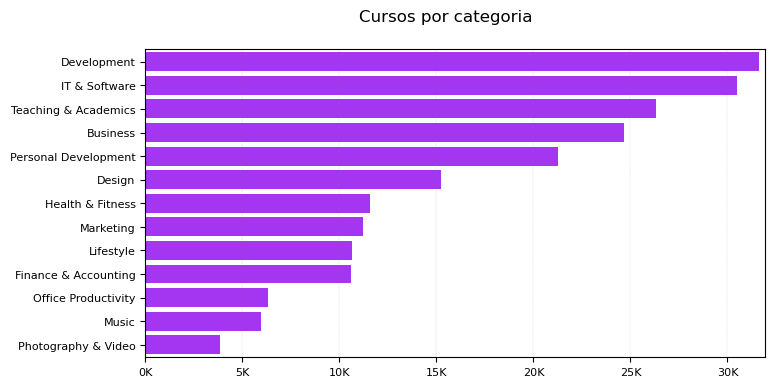

In [354]:
# Categoria pela quantidade de cursos
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.barh(udemy_count_category_courses.index, udemy_count_category_courses, color='#A435F0')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.margins(0.01)
plt.grid(axis='x', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.suptitle('Cursos por categoria')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)   # legend fontsize

# # Porcentagem
# total = len(udemy_cursos['category'])
# for p in ax.patches:
#         percentage = '{:.1f}%'.format(100 * p.get_width()/total)
#         x = p.get_x() + p.get_width()
#         y = p.get_y() + p.get_height() - 0.5
#         ax.annotate(percentage, (x, y))
        
plt.show()

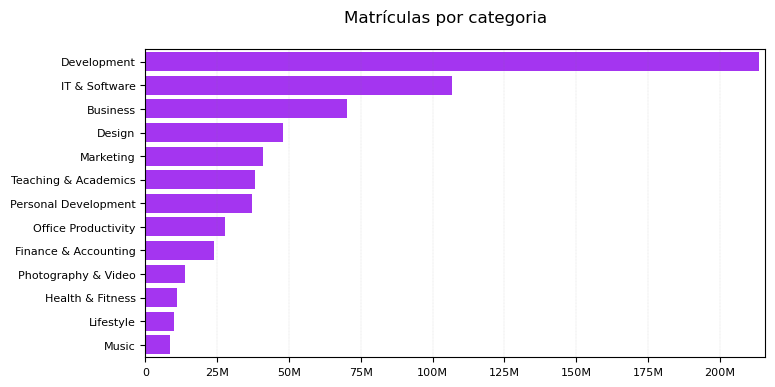

In [366]:
# Categoria pela quantidade de matriculados
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.barh(udemy_count_category_subscribers.index, udemy_count_category_subscribers, color='#A435F0')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M' if x!=0 else 0))
plt.margins(0.01)
plt.grid(axis='x', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.suptitle('Matrículas por categoria')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)   # legend fontsize
        
plt.show()

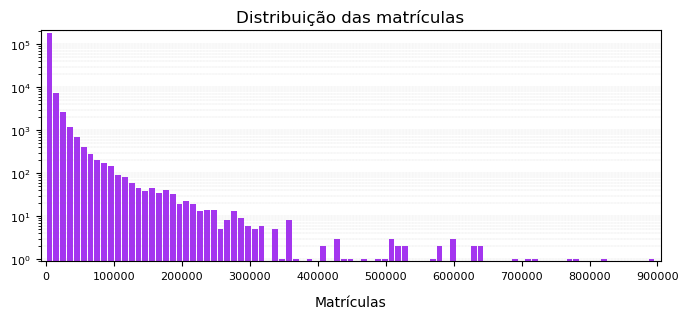

In [368]:
# Distribuição dos matriculados por curso
plt.figure(figsize = (8, 3))
plt.hist(udemy_cursos[(udemy_cursos['num_subscribers']>0) & (udemy_cursos['num_subscribers']<1e6)]['num_subscribers'],
         bins=89, 
         rwidth=0.85, 
         color='#A435F0')
plt.grid(axis='y', color ='Grey', which='both', linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,1000001,100000))
plt.margins(0.01)
plt.xlabel("Matrículas", labelpad=10)
plt.yscale('log')
plt.title('Distribuição das matrículas',loc='center')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

#### Conclusão
Os cursos da Udemy estão divididos em 13 categorias e 130 subcategorias.  

A categoria de Desenvolvimento possui a maior quantidade de cursos (31643), seguido por TI & Software (30479) e Ensino Acadêmico (26293).  

A categoria de Desenvolvimento possui a maior quantidade de matrículas (213M), seguido por TI & Software (106M) e Negócios (70M).

### Data

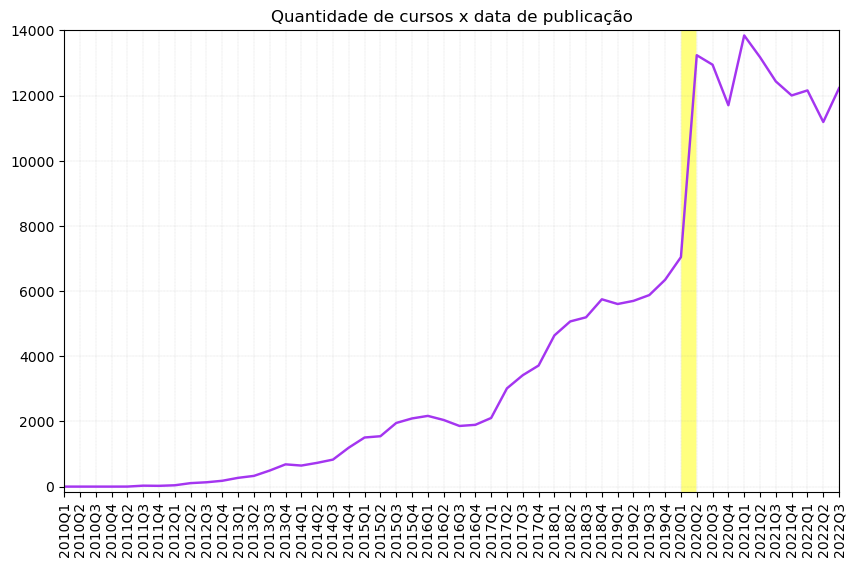

In [27]:
# Quantidade de cursos pela data
udemy_cursos['published_QDate'] = pd.PeriodIndex(udemy_cursos.published_time, freq='Q')
udemy_publish = udemy_cursos.groupby(['published_QDate'], as_index=False).size().sort_values(by='published_QDate')
udemy_publish['published_QDate'] = udemy_publish['published_QDate'].apply(str)
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(udemy_publish.index[:-1], udemy_publish['size'][:-1], color='#A435F0', linewidth=1.75)
plt.margins(x=0, y=0.012)
#plt.ylabel("Quantidade de cursos", labelpad=5, fontsize=12)
#plt.xlabel("Data de publicação", labelpad=10, fontsize=12)
plt.xticks(udemy_publish.index[:-1])
plt.xticks(rotation = 90)

ax.set_xticklabels(list(udemy_publish['published_QDate'][:-1]))
plt.grid(color ='Grey',
        linestyle ='-.', linewidth = 0.1)

# cria uma linha amarela entre os vértices 39 e 40 para destaque
verts = [(udemy_publish.index[39], -1000), (udemy_publish.index[39], udemy_publish['size'][39]+10000), 
         (udemy_publish.index[40], udemy_publish['size'][40]+10000),(udemy_publish.index[40], -1000)]
poly = Polygon(verts, facecolor ='yellow',
               edgecolor ='1.0', alpha = 0.5)
ax.add_patch(poly)

plt.title('Quantidade de cursos x data de publicação',loc='center', fontdict={'fontsize': 12})
plt.show()

In [259]:
udemy_earned_year = udemy_cursos.groupby(udemy_cursos.published_time.dt.year)['earned'].sum()
udemy_earned_year.sort_values(ascending=False).apply((lambda x: '${:,.2f}'.format(x/1e6) + 'B'))

published_time
2020    $10,945.56B
2018     $9,947.16B
2019     $9,156.03B
2017     $8,225.45B
2016     $6,759.82B
2021     $5,957.98B
2015     $4,756.94B
2014     $1,924.93B
2022     $1,391.24B
2013       $713.50B
2012       $126.14B
2011        $27.62B
2010         $0.22B
Name: earned, dtype: object

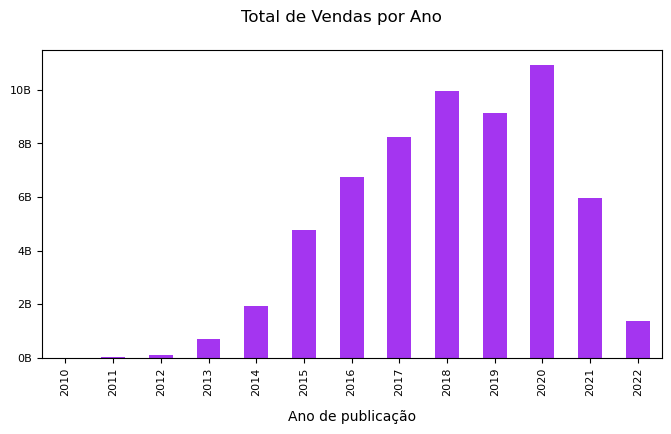

In [261]:
fig, ax = plt.subplots(figsize=(8, 4)) 
udemy_earned_year.plot.bar(color='#A435F0')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1e9) + 'B'))
plt.suptitle('Total de Vendas por Ano')
plt.xlabel("Ano de publicação", labelpad=10)
#plt.ylabel("Total de vendas")

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)   # legend fontsize

plt.show()

#### Conclusão
No início de 2020 ocorreu um enorme crescimento na plataforma, provavelmente devido ao início da pandemia.

Os anos de 2018, 2019 e 2020 possuem o maior total de vendas, com 2020 sendo a maior com o total de 10.9 bilhões de vendas.


### Top 10

In [28]:
# Top 10 tópico por quantidade de cursos
udemy_topic = (udemy_cursos.groupby(['topic'], as_index=False)
           .size()
           .sort_values(by='size',ascending=False)
           .rename(columns={'topic':'Tópico', 'size':'Quantidade'}))
print('Top 10 tópicos por quantidade de cursos:')
print(udemy_topic[:10].to_markdown(tablefmt="rounded_outline", index=False))

Top 10 tópicos por quantidade de cursos:
╭─────────────────────────┬──────────────╮
│ Tópico                  │   Quantidade │
├─────────────────────────┼──────────────┤
│ Python                  │         2553 │
│ Excel                   │         2072 │
│ English Language        │         1495 │
│ WordPress               │         1442 │
│ Math                    │         1341 │
│ Photoshop               │         1294 │
│ Microsoft Certification │         1232 │
│ Java                    │         1128 │
│ JavaScript              │         1092 │
│ Personal Development    │          978 │
╰─────────────────────────┴──────────────╯


In [29]:
# Top 10 tópico por matriculas
udemy_subs = (udemy_cursos.groupby(['topic'], as_index=False)
              .sum(numeric_only=True)
              .sort_values(by='num_subscribers',ascending=False)
              .rename(columns={'topic':'Tópico', 'num_subscribers': 'Matrículas'}))
print('Top 10 tópicos por quantidade de matrículas:')
print(udemy_subs[:10][['Tópico', 'Matrículas']].to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f'))

Top 10 tópicos por quantidade de matrículas:
╭─────────────────────┬──────────────╮
│ Tópico              │   Matrículas │
├─────────────────────┼──────────────┤
│ Python              │     32516280 │
│ Excel               │     12822452 │
│ JavaScript          │     11801744 │
│ Java                │     11203723 │
│ Web Development     │      9293697 │
│ Photoshop           │      8976024 │
│ Ethical Hacking     │      8280273 │
│ WordPress           │      7080627 │
│ CSS                 │      6482557 │
│ Android Development │      5567763 │
╰─────────────────────┴──────────────╯


In [50]:
my_cols = ['title', 'instructor_name', 'price', 'num_reviews', 'num_subscribers', 'num_comments', 'content_length_min']

def top5_courses(df, col):
    top5_df = df.nlargest(5, col).reset_index(drop=True)
    return top5_df[my_cols]
    #print(top5_df[my_cols].to_markdown(tablefmt="rounded_outline", index=False))

In [51]:
top5_courses(udemy_cursos, 'num_reviews')

,title,instructor_name,price,num_reviews,num_subscribers,num_comments,content_length_min
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,199.99,436457,1612862,39040,1333
1,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,149.99,332598,1108811,36101,1264
2,The Web Developer Bootcamp 2022,Colt Steele,199.99,246624,823805,31001,3827
3,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,199.99,228108,771176,27723,3939
4,Angular - The Complete Guide (2022 Edition),Maximilian Schwarzmüller,189.99,172991,626304,24886,2082


In [32]:
# Top 10 cursos por quantidade de avaliações
udemy_review = (udemy_cursos.groupby(['title'], as_index=False)
              .sum(numeric_only=True)
              .sort_values(by='num_reviews',ascending=False)
              .rename(columns={'title':'Título', 'num_reviews': 'Avaliações'}))
print('Top 10 tópicos por quantidade de matrículas:')
print(udemy_review[:10][['Título', 'Avaliações']].to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f'))

Top 10 tópicos por quantidade de matrículas:
╭──────────────────────────────────────────────────────────────┬──────────────╮
│ Título                                                       │   Avaliações │
├──────────────────────────────────────────────────────────────┼──────────────┤
│ 2022 Complete Python Bootcamp From Zero to Hero in Python    │       436607 │
│ Microsoft Excel - Excel from Beginner to Advanced            │       332598 │
│ The Web Developer Bootcamp 2022                              │       246624 │
│ The Complete 2022 Web Development Bootcamp                   │       228108 │
│ Angular - The Complete Guide (2022 Edition)                  │       172991 │
│ Java Programming Masterclass covering Java 11 & Java 17      │       170478 │
│ React - The Complete Guide (incl Hooks, React Router, Redux) │       163324 │
│ Machine Learning A-Z™: Hands-On Python & R In Data Science   │       162432 │
│ The Complete Digital Marketing Course - 12 Courses in 1      │       1549

In [53]:
# Função para gerar os Top 10
def top10_courses(df, col):
    col_map = {
        'num_reviews': 'Avaliações',
        'num_subscribers': 'Matrículas',
        'num_comments': 'Comentários'
    }
    col_newname = col_map.get(col)
    if not col_newname:
        return "Coluna não existe."
    
    renamed_columns = {'title': 'Curso', 'instructor_name': 'Instrutor', 'avg_rating': 'Nota', col: col_newname}
    top10_df = df.sort_values(col, ascending=False).reset_index(drop=True)[:10]
    
    print(f"Top 10 cursos por quantidade de {col_newname}")
    print((top10_df[['title', 'instructor_name', 'avg_rating', col]]
           .rename(columns=renamed_columns)
           .to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f')))


In [54]:
top10_courses(udemy_cursos, 'num_reviews')

Top 10 cursos por quantidade de Avaliações
╭──────────────────────────────────────────────────────────────┬───────────────────────────────────────┬────────┬──────────────╮
│ Curso                                                        │ Instrutor                             │   Nota │   Avaliações │
├──────────────────────────────────────────────────────────────┼───────────────────────────────────────┼────────┼──────────────┤
│ 2022 Complete Python Bootcamp From Zero to Hero in Python    │ Jose Portilla                         │      5 │       436457 │
│ Microsoft Excel - Excel from Beginner to Advanced            │ Kyle Pew                              │      5 │       332598 │
│ The Web Developer Bootcamp 2022                              │ Colt Steele                           │      5 │       246624 │
│ The Complete 2022 Web Development Bootcamp                   │ Dr. Angela Yu                         │      5 │       228108 │
│ Angular - The Complete Guide (2022 Edition)         

In [55]:
top10_courses(udemy_cursos, 'num_subscribers')

Top 10 cursos por quantidade de Matrículas
╭────────────────────────────────────────────────────────────┬─────────────────┬────────┬──────────────╮
│ Curso                                                      │ Instrutor       │   Nota │   Matrículas │
├────────────────────────────────────────────────────────────┼─────────────────┼────────┼──────────────┤
│ Java Tutorial for Complete Beginners                       │ John Purcell    │      4 │      1752364 │
│ 2022 Complete Python Bootcamp From Zero to Hero in Python  │ Jose Portilla   │      5 │      1612862 │
│ Microsoft Excel - Excel from Beginner to Advanced          │ Kyle Pew        │      5 │      1108811 │
│ Automate the Boring Stuff with Python Programming          │ Al Sweigart     │      5 │      1056369 │
│ Machine Learning A-Z™: Hands-On Python & R In Data Science │ Kirill Eremenko │      5 │       896340 │
│ The Web Developer Bootcamp 2022                            │ Colt Steele     │      5 │       823805 │
│ Introducti

In [56]:
top10_courses(udemy_cursos, 'num_comments')

Top 10 cursos por quantidade de Comentários
╭────────────────────────────────────────────────────────────┬──────────────────────────┬────────┬───────────────╮
│ Curso                                                      │ Instrutor                │   Nota │   Comentários │
├────────────────────────────────────────────────────────────┼──────────────────────────┼────────┼───────────────┤
│ 2022 Complete Python Bootcamp From Zero to Hero in Python  │ Jose Portilla            │      5 │         39040 │
│ Microsoft Excel - Excel from Beginner to Advanced          │ Kyle Pew                 │      5 │         36101 │
│ The Web Developer Bootcamp 2022                            │ Colt Steele              │      5 │         31001 │
│ The Complete 2022 Web Development Bootcamp                 │ Dr. Angela Yu            │      5 │         27723 │
│ The Complete Digital Marketing Course - 12 Courses in 1    │ Rob Percival             │      5 │         27540 │
│ Angular - The Complete Guide (2022

In [293]:
udemy_earned_year = (udemy_cursos.groupby(udemy_cursos.published_time.dt.year)['earned']
                     .sum()
                     .sort_values(ascending=False)
                     .apply((lambda x: '${:,.2f}'
                     .format(x/1e6) + 'B'))
                     .reset_index()
                     .rename(columns={'published_time':'Ano', 'earned':'Total de Vendas'}))
#udemy_earned_year.sort_values(ascending=False).apply((lambda x: '${:,.2f}'.format(x/1e6) + 'B'))

print('Top 10 anos por total de venda:')
print(udemy_earned_year[:10].to_markdown(tablefmt="rounded_outline", index=False))

Top 10 anos por total de venda:
╭───────┬───────────────────╮
│   Ano │ Total de Vendas   │
├───────┼───────────────────┤
│  2020 │ $10,945.56B       │
│  2018 │ $9,947.16B        │
│  2019 │ $9,156.03B        │
│  2017 │ $8,225.45B        │
│  2016 │ $6,759.82B        │
│  2021 │ $5,957.98B        │
│  2015 │ $4,756.94B        │
│  2014 │ $1,924.93B        │
│  2022 │ $1,391.24B        │
│  2013 │ $713.50B          │
╰───────┴───────────────────╯


In [216]:
udemy_teacher = udemy_cursos.groupby(['instructor_url'], as_index=False).sum(numeric_only=True)
udemy_teacher2 = (udemy_teacher.sort_values(by='earned',ascending=False)
                  .join(udemy_cursos[['instructor_url', 'instructor_name', 'language']].set_index('instructor_url'), on='instructor_url').drop_duplicates()
                  .rename(columns={'instructor_name':'Professor', 'instructor_url':'URL do professor', 'earned':'Lucro', 'language':'Idioma'}))
print('Top 10 professores com maior lucro ($):')
print(udemy_teacher2[0:10][['Professor', 'URL do professor', 'Lucro', 'Idioma']].to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f'))

Top 10 professores com maior lucro ($):
╭──────────────────────┬─────────────────────────────┬───────────────┬────────────────────╮
│ Professor            │ URL do professor            │         Lucro │ Idioma             │
├──────────────────────┼─────────────────────────────┼───────────────┼────────────────────┤
│ Srinidhi Ranganathan │ /user/srinidhi-ranganathan/ │ 1,735,131,640 │ English            │
│ Srinidhi Ranganathan │ /user/srinidhi-ranganathan/ │ 1,735,131,640 │ Tamil              │
│ Learn Tech Plus      │ /user/josh-werner/          │ 1,198,360,878 │ English            │
│ Learn Tech Plus      │ /user/josh-werner/          │ 1,198,360,878 │ Italian            │
│ TJ Walker            │ /user/tjwalker2/            │ 1,171,615,935 │ English            │
│ TJ Walker            │ /user/tjwalker2/            │ 1,171,615,935 │ German             │
│ TJ Walker            │ /user/tjwalker2/            │ 1,171,615,935 │ Hindi              │
│ TJ Walker            │ /user/tjwalker2

In [68]:
#udemy_cursos[(udemy_cursos['language']=='Portuguese')]
             
udemy_teacher = udemy_cursos[(udemy_cursos['language']=='Portuguese')].groupby(['instructor_url'], as_index=False).sum(numeric_only=True)
udemy_teacher2 = (udemy_teacher.sort_values(by='earned',ascending=False)
                  .join(udemy_cursos[['instructor_url', 'instructor_name']].set_index('instructor_url'), on='instructor_url').drop_duplicates()
                  .rename(columns={'instructor_name':'Professor', 'instructor_url':'URL do professor', 'earned':'Lucro'}))
print('Top 10 professores brasileiros com maior lucro ($):')
print(udemy_teacher2[0:10][['Professor', 'URL do professor', 'Lucro']].to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f'))

Top 10 professores brasileiros com maior lucro ($):
╭──────────────────────────────────┬────────────────────────────────┬─────────────╮
│ Professor                        │ URL do professor               │       Lucro │
├──────────────────────────────────┼────────────────────────────────┼─────────────┤
│ André Fontenelle                 │ /user/andrefontenelle-2/       │ 178,739,392 │
│ Leonardo Moura Leitao            │ /user/leonardomouraleitao/     │ 168,287,700 │
│ Diego Mariano, Ph.D.             │ /user/diego-mariano/           │ 148,710,426 │
│ Jamilton Damasceno               │ /user/jamiltondamasceno/       │ 114,266,282 │
│ Gustavo Farias 300.000+ Alunos   │ /user/gustavo-farias-2/        │ 113,730,665 │
│ Jorge Sant Ana                   │ /user/jorgetadeusantanasilva/  │  94,894,479 │
│ Diego Davila • 700.000+ Students │ /user/diego-davila/            │  94,428,330 │
│ Felipe Mafra                     │ /user/felipe-mafra-dos-santos/ │  82,200,943 │
│ João Paulo de Lira    

In [221]:
reviews = udemy_cursos[['title','num_reviews','num_lectures','topic']]
reviews
#df.groupby(['Courses','Fee']).count()

,title,num_reviews,num_lectures,topic
0,Online Vegan Vegetarian Cooking School,134,37,Vegan Cooking
1,The Lean Startup Talk at Stanford E-Corner,709,9,Lean Startup
2,"How To Become a Vegan, Vegetarian, or Flexitarian",41,14,Vegan Cooking
3,How to Train a Puppy,395,36,Pet Training
4,Web Design from the Ground Up,38,38,Web Design
...,...,...,...,...
209729,Let's Speak Urdu - The Urdu Grammar,0,5,Urdu Language
209730,CompTIA Linux+ (XKO-004/005 # 2 Practice Exam ...,0,0,CompTIA Linux+
209731,CISSP 4 full exams #1 : All CISSP domains - 12...,0,0,CISSP - Certified Information Systems Security...
209732,JD Edwards EnterpriseOne Fixed Assets Accounti...,0,9,Financial Accounting


<AxesSubplot: xlabel='num_lectures', ylabel='num_reviews'>

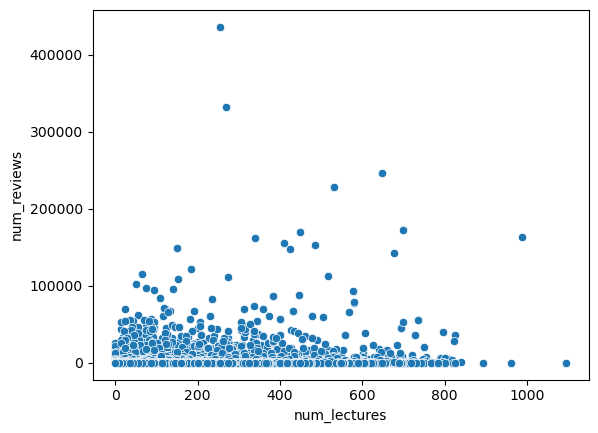

In [71]:
sns.scatterplot(x = 'num_lectures', y = 'num_reviews', data = reviews)

In [72]:
curso = udemy_cursos.groupby(['topic','num_subscribers'])['num_reviews'].sum().sort_values(ascending=False)

curso2 = udemy_cursos.groupby(['topic']).agg({'num_reviews':'sum','num_subscribers':'sum'}).reset_index().sort_values(by=['num_subscribers'],ascending=False).head(10)
curso2
#df.groupby(['Courses','Fee']).count()

,topic,num_reviews,num_subscribers
2795,Python,2670370,32516280
1200,Excel,1409273,12822452
1794,JavaScript,904265,11801744
1779,Java,944527,11203723
3676,Web Development,1060685,9293697
2618,Photoshop,371352,8976024
1193,Ethical Hacking,385783,8280273
3735,WordPress,295251,7080627
569,CSS,432756,6482557
213,Android Development,344513,5567763


<AxesSubplot: xlabel='num_reviews', ylabel='num_subscribers'>

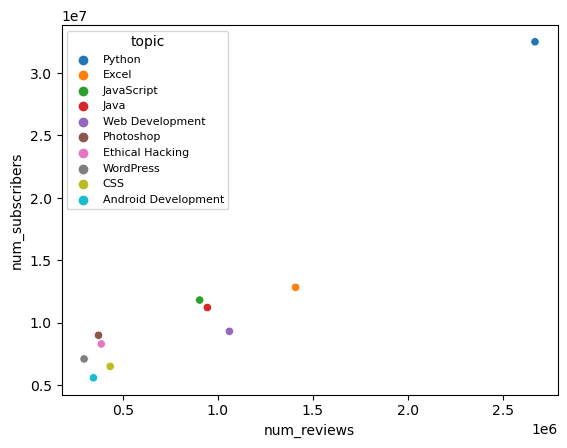

In [73]:
sns.scatterplot(x = 'num_reviews', y = 'num_subscribers', data = curso2, hue='topic')
# Muitos que compram um curso de Python tende a terminá-lo/avaliá-lo
# Os cursos de Web Development e Photoshop possuem quantidades semelhantes de cursos comprados,
# O curso de Photoshop possui bem menos avaliações se comparado ao de Web Development
# Muitos alunos de Photoshop tendem a comprar mas não terminar/avaliar o curso.

## 3.3\. Conclusões

- 90% dos cursos são pagos e 10% são gratuitos. Cerca de 20% dos cursos custam $19.99.  
- A Udemy oferece cursos em 79 idiomas, com 59% deles em inglês e 8% em português e espanhol.  
- Os cursos da categoria de Desenvolvimento e Tecnologia da Informação possuem a maior quantidade de cursos e matrículas.  
- Os cursos de Desenvolvimento possuem mais de 200 milhões de matriculas ao todo, em comparação com os cursos de TI com menos de 125 milhões.  
- Os cursos de Desenvolvimento e Design possuem a maior média de duração, com 8 horas e 6 horas respectivamente.  
- No início de 2020 ocorreu um enorme crescimento de cursos criados na plataforma, provavelmente devido ao início da pandemia.  
- Os anos com maiores vendas na plataforma foram 2018 (9.9 bilhões), 2019 (9.1 bilhões) e 2020 (10.9 bilhões).  
- Os cursos da Desenvolvimento e Design possuem a maior média de duração, com 8 e 6 horas respectivamente.  
- A média total de horas dos cursos da Udemy é de 4.5 horas.  

# 4\. Dataset Comentários

In [4]:
udemy_comentarios.head(5)

,id,course_id,rate,date,display_name,comment
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...


In [7]:
# Mostra os valores ausentes
print('Quantidade de valores ausentes:')
print(udemy_comentarios.isnull().sum())
print("---"*10)
print('Porcentagem de valores ausentes:')
print(round(udemy_comentarios.isnull().mean() * 100, 2))

Quantidade de valores ausentes:
id                  0
course_id           0
rate                0
date                0
display_name    75362
comment          6333
dtype: int64
------------------------------
Porcentagem de valores ausentes:
id              0.00
course_id       0.00
rate            0.00
date            0.00
display_name    0.80
comment         0.07
dtype: float64


In [ ]:
# Remove as linhas com valores ausentes
#udemy_comentarios2 = udemy_comentarios2.dropna(axis=0).reset_index(drop=True)

# Mapeia o título do curso do dataframe 'udemy_cursos' para o dataframe 'udemy_comentarios'
dict_id = dict(zip(udemy_cursos['id'], udemy_cursos['title']))
udemy_comentarios['course_title'] = udemy_comentarios['course_id'].map(dict_id)

In [ ]:
# Nova coluna 'review baseado na coluna 'rate'.
udemy_comentarios['review'] = pd.cut(udemy_comentarios['rate'], bins=[0, 2.5, 3.0, 5.0], labels=['Negative', 'Neutral', 'Positive'])
udemy_comentarios.head()

In [19]:
udemy_comentarios2 = pd.read_csv('data/udemy_comentarios2.csv', delimiter=';', encoding='latin') # https://www.kaggle.com/datasets/hossaingh/udemy-courses

In [20]:
udemy_comentarios2

,id,course_id,rate,date,display_name,comment
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,123 Anão safado! @#@#@@#
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,cuando aparece la presentadora en la esquina ...
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,123 This course is the best on Udemy. This br...


In [22]:
# Using strip() method to remove the newline character from a string. 
# The strip() method will remove both trailing and leading newlines from the string. 
# It also removes any whitespaces on both sides of a string.
udemy_comentarios2['comment'] = udemy_comentarios2['comment'].str.replace('[^\w\s]', ' ', regex=True)
#udemy_comentarios2 = udemy_comentarios2.reset_index(drop=True)
udemy_comentarios2

,id,course_id,rate,date,display_name,comment
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,123 Anão safado
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer hea...
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,cuando aparece la presentadora en la esquina ...
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,123 This course is the best on Udemy This br...


In [23]:
# O dataset é muito grande e levarias horas para a biblioteca acessar todas as linhas.
# Deste modo dataset está processado e salvo na pasta 'data' para poupar tempo e com
# a coluna'comment_language' já criada em um arquivo '.csv' (udemy_comments_languages.csv). 
# O código abaixo é apenas para consulta.
    
# Detecta o idioma dos comentários

langdet = []
    
for idx, val in udemy_comentarios2['comment'].items():                                         
    try:                                                          
        lang=langdetect.detect(val)                                      
    except:                                                       
        lang='no'
        print("This row throws error:", udemy_comentarios2.iloc[idx])
        print("----"*10)
        print("\n")
    langdet.append(lang)    

langdet_df = pd.DataFrame(langdet, columns=['Language'])
langdet_df.to_csv('udemy_comments_languages.csv', index=False)

C:\Users\smile\AppData\Local\Temp\ipykernel_12468\899687432.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, val in udemy_comentarios2['comment'].iteritems():


# Exportando os dados

In [ ]:
# Exporta o dataset final
udemy_cursos.to_csv('data/udemy_cursos_final.csv', sep =';', index=False)